# Extract and plot data of Map section (Indices)
* This program is used to read the indices in Maps section of the OCDP data portal
* We just plot one map, user just need change the varName, RCP and Period
* To run this program, it is neccesary to install: 
   - pandas;
   - numpy;
   - matplotlib and 
   - geopandas
---
*Programmer: Dr. Ziwang Deng, LAMPS, Department of Mathematics & Statistics, York University*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Polygon
from geopandas import GeoSeries
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
varNames = ['CDD','Cold_day','Cold_night','DTR','FD','GSL','HDD','Hot_day','Hot_night','HWDI_days','HWDI_period',
            'HWDI_strength','ID','GS_SartDay','GS_EndDay','pr95pDays','pr95pTOT','pr99pDays','pr99pTOT','prCDD','PRCPTOT',
            'prCWD','R1mm','R5mm','R10mm','R20mm','R25mm','RX1day','RX5day','SDII','SU','tnCSDI','TNn','TNx',
            'TR','TXn','TXx','txWSDI']
colNames =['ID','Longitude','Latitude',
           'RCP85_P5_2050s','RCP85_P25_2050s','RCP85_P50_2050s','RCP85_P75_2050s','RCP85_P95_2050s',
           'RCP60_P5_2050s','RCP60_P25_2050s','RCP60_P50_2050s','RCP60_P75_2050s','RCP60_P95_2050s',
           'RCP45_P5_2050s','RCP45_P25_2050s','RCP45_P50_2050s','RCP45_P75_2050s','RCP45_P95_2050s',
           'RCP26_P5_2050s','RCP26_P25_2050s','RCP26_P50_2050s','RCP26_P75_2050s','RCP26_P95_2050s',
           'RCP85_P5_2080s','RCP85_P25_2080s','RCP85_P50_2080s','RCP85_P75_2080s','RCP85_P95_2080s',
           'RCP60_P5_2080s','RCP60_P25_2080s','RCP60_P50_2080s','RCP60_P75_2080s','RCP60_P95_2080s',
           'RCP45_P5_2080s','RCP45_P25_2080s','RCP45_P50_2080s','RCP45_P75_2080s','RCP45_P95_2080s',
           'RCP26_P5_2080s','RCP26_P25_2080s','RCP26_P50_2080s','RCP26_P75_2080s','RCP26_P95_2080s',
           'REF_1986_2005']

In [3]:
# what variable do you want to display or extract
varName='CDD'
RCP = 'REF' # RCP85 or RCP60 or RCP45 or RCP26 or REF
Percentile = '50' #5 or 25 or 50 or 75 or 95
Period = '2050s' #2050s or 2080s or 1986_2005

In [4]:
# read and map the variable
csvfileName = '../data/maps/indices/' + varName + '_Ann_8964Pts_RCPs_50s80s_Diffs_EC.csv'
colName = RCP + '_P' + Percentile + '_' + Period
if((RCP=='REF') or (Period =='1986_2005')):
   colName='REF_1986_2005'
data=pd.read_csv(csvfileName)


C:\Users\ldxd\Anaconda3\lib\site-packages\geopandas\plotting.py:385: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  "(for consistency with matplotlib)", FutureWarning)


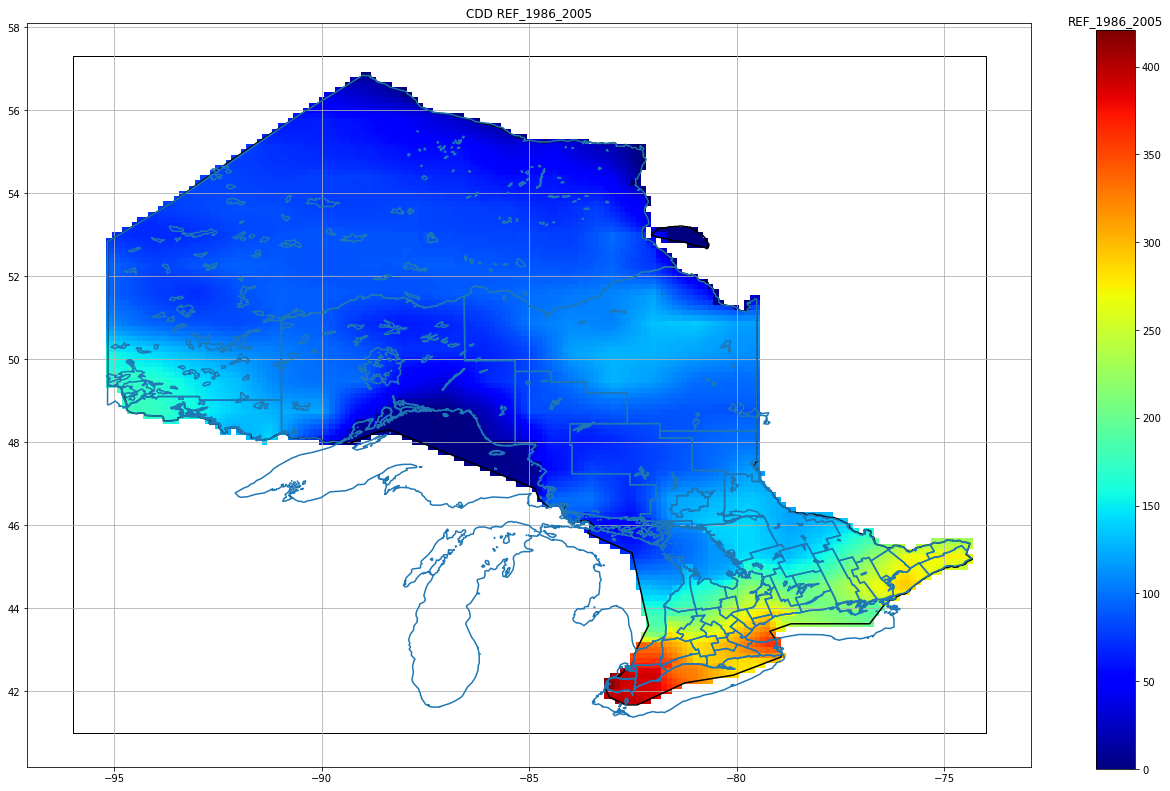

In [5]:
# read geojson files
lakefile='../shapefiles/Lake_Arc_simplify.geojson'
Municipal = '../shapefiles/Municipal_Arc_simplify.geojson'
Ontario = '../shapefiles/Ontario_arc.geojson'
OnPolygon = '../shapefiles/polygon9864.geojson'



# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.1)
cmp = 'jet'
p1=Polygon([(-96,41),(-74,41),(-74,57.3),(-96,57.3)])
g = GeoSeries(p1)
base=g.plot(color='white', edgecolor='black', figsize=(18,27))


ont=gpd.read_file(Ontario)
ont.plot(ax=base, color='black', edgecolor='black')

lake=gpd.read_file(lakefile)
lake.plot(ax=base)

muni=gpd.read_file(Municipal)
muni.plot(ax=base)
poly=gpd.read_file(OnPolygon)

polydata=poly.merge(data, on='id')

# map_plot = polydata.plot(ax=base, column=colName, colormap='jet')

ax = polydata.plot(ax=base, column=colName, colormap=cmp,vmin=min(polydata[colName]),vmax=max(polydata[colName]))

# setting legend
# thanks to: https://stackoverflow.com/questions/54236083/geopandas-reduce-legend-size-and-remove-white-space-below-map
ax.set_title(varName + ' ' + colName)
ax.grid() 
fig = ax.get_figure()
# here, need trial-and-error to get [l,b,w,h] right
# l:left, b:bottom, w:width, h:height; in normalized unit (0-1)

cbax = fig.add_axes([0.95, 0.31, 0.03, 0.38])   
cbax.set_title(colName)

sm = plt.cm.ScalarMappable(cmap=cmp,norm=plt.Normalize(vmin=min(polydata[colName]), vmax=max(polydata[colName])))
sm._A = []
fig.colorbar(sm, cax=cbax, format="%d")
plt.show()